In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("census_income_dataset.csv",na_values=['?',-10000])

In [3]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

In [4]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.drop(["fnlwgt"],axis=1, inplace=True)

In [6]:
data.drop(["education"],axis=1, inplace=True)

In [7]:
data.drop(["race"],axis=1, inplace=True)

In [8]:
num_var=list(data.dtypes[data.dtypes!=object].index)
num_var

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [9]:
cat_var=list(data.dtypes[data.dtypes==object].index)
cat_var.remove('income_level')
cat_var

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'sex',
 'native_country']

In [10]:
for col in cat_var:
    data[col].fillna(data[col].mode()[0],inplace=True)
for col in num_var:
    data[col].fillna(data[col].mean(),inplace=True)

In [11]:
data.isna().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [12]:
data.income_level.value_counts()

<=50K    37155
>50K     11687
Name: income_level, dtype: int64

In [13]:
Y=data.pop('income_level')
for var in cat_var:
    data[var].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(data[var],prefix=var)
    data=pd.concat([data,dummies],axis=1)
    data.drop([var],axis=1,inplace=True)

In [14]:
X=data
data

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0.0,0.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0.0,0.0,36.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,64,9,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,13,0.0,0.0,50.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,13,5455.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
X.count(axis='columns')

0        83
1        83
2        83
3        83
4        83
         ..
48837    83
48838    83
48839    83
48840    83
48841    83
Length: 48842, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [17]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

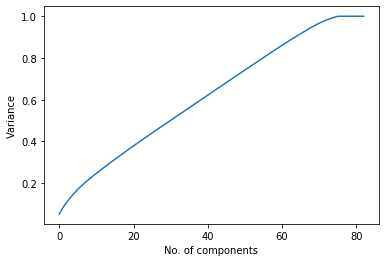

In [66]:
from sklearn.decomposition import PCA
pca=PCA().fit(scaled_X_train)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('No. of components')
plt.ylabel('Variance')
plt.plot(list(range(0,83)),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [67]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05266222, 0.0834174 , 0.10914111, 0.13073473, 0.15166731,
       0.17076316, 0.18765551, 0.20351247, 0.21847187, 0.23298224,
       0.24716332, 0.26092727, 0.27460359, 0.28808653, 0.30135824,
       0.31450894, 0.32749559, 0.34045808, 0.35331249, 0.36601572,
       0.37869222, 0.39128892, 0.40371599, 0.41604248, 0.42834824,
       0.44057273, 0.45270895, 0.46482673, 0.47692836, 0.48902478,
       0.50110993, 0.5131925 , 0.52527057, 0.53734531, 0.54941427,
       0.56148197, 0.57354867, 0.58561424, 0.59767781, 0.60974   ,
       0.62180149, 0.63386068, 0.64591925, 0.65797568, 0.67002818,
       0.68207958, 0.69412553, 0.70616966, 0.71819062, 0.73020033,
       0.74219424, 0.75416209, 0.76611925, 0.77806165, 0.78996869,
       0.80186853, 0.81371772, 0.82550757, 0.83727784, 0.84896157,
       0.86057647, 0.87196343, 0.88315799, 0.89424882, 0.90521654,
       0.9160535 , 0.92671778, 0.93724792, 0.94756025, 0.95714862,
       0.96647164, 0.9746654 , 0.98211355, 0.98873136, 0.99458

In [68]:
pca=PCA(n_components=73)
scaled_X_train=pca.fit_transform(scaled_X_train)

In [18]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_smote,Y_smote=oversample.fit_sample(scaled_X_train,Y_train)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated

In [19]:
from sklearn.model_selection import GridSearchCV
def svc_param_rbf(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    #deg_vals=[1,2,3,4]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_
#svc_param_rbf(X_smote,Y_smote,2)

In [20]:
svc_rbf_smote=svm.SVC(kernel='rbf',C=0.01,gamma=0.001)
svc_rbf_smote.fit(X_smote,Y_smote)
y_pred=svc_rbf_smote.predict(scaled_X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.724332070836319

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[5096 2319]
 [ 374 1980]]
